# Customer Churn Analysis and Prediction

# Task 1: Data Preparation

In [23]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
%matplotlib inline
# Loading the CSV with pandas
file_path = 'C:/Users/Dell/Downloads/Telco_Customer_Churn_Dataset  (3).csv'
df = pd.read_csv(file_path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
# Display basic information about the dataset
print(df.info())

# Summary statistics for numerical features
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# Drop rows with missing values
df = df.dropna()

# Fill missing values with mean or median
# df = df.fillna(df.mean())

# Check again for missing values
print(df.isnull().sum())


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [26]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [27]:
print(df_encoded.head())


   customerID  SeniorCitizen  tenure  MonthlyCharges TotalCharges Churn  \
0  7590-VHVEG              0       1           29.85        29.85    No   
1  5575-GNVDE              0      34           56.95       1889.5    No   
2  3668-QPYBK              0       2           53.85       108.15   Yes   
3  7795-CFOCW              0      45           42.30      1840.75    No   
4  9237-HQITU              0       2           70.70       151.65   Yes   

   gender_Female  gender_Male  Partner_No  Partner_Yes  ...  \
0              1            0           0            1  ...   
1              0            1           1            0  ...   
2              0            1           1            0  ...   
3              0            1           1            0  ...   
4              1            0           1            0  ...   

   StreamingMovies_Yes  Contract_Month-to-month  Contract_One year  \
0                    0                        1                  0   
1                    0        

In [28]:
# Split the dataset into training and testing sets
# Assuming 'Churn' is the target variable
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [29]:
# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5634, 46) (5634,)
Testing set shape: (1409, 46) (1409,)


# Task 2: Exploratory Data Analysis (EDA)

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Calculate and visually represent the overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True) * 100
print("Overall Churn Rate:")
print(churn_rate)

Overall Churn Rate:
No     73.463013
Yes    26.536987
Name: Churn, dtype: float64


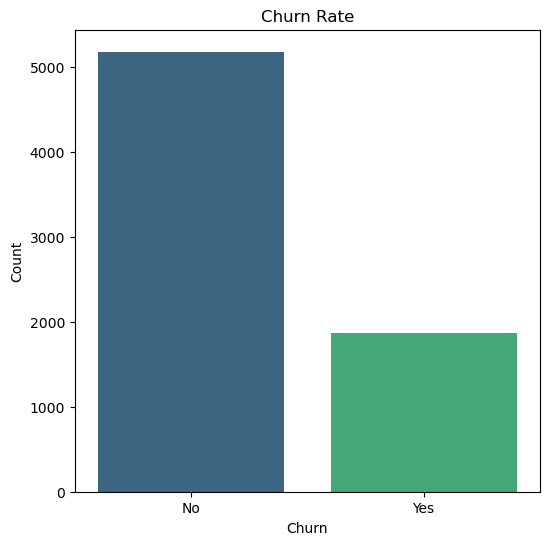

In [33]:
# Visual representation of churn rate
plt.figure(figsize=(6, 6))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Churn Rate')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [34]:
# Explore customer distribution by gender
gender_distribution = df['gender'].value_counts(normalize=True) * 100
print("\nCustomer Distribution by Gender:")
print(gender_distribution)


Customer Distribution by Gender:
Male      50.47565
Female    49.52435
Name: gender, dtype: float64


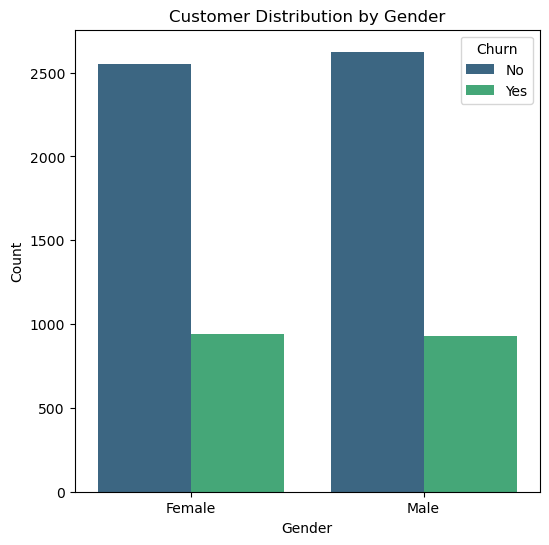

In [35]:
# Visual representation of customer distribution by gender
plt.figure(figsize=(6, 6))
sns.countplot(x='gender', data=df, hue='Churn', palette='viridis')
plt.title('Customer Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [36]:
# Explore customer distribution by partner status
partner_distribution = df['Partner'].value_counts(normalize=True) * 100
print("\nCustomer Distribution by Partner Status:")
print(partner_distribution)


Customer Distribution by Partner Status:
No     51.69672
Yes    48.30328
Name: Partner, dtype: float64


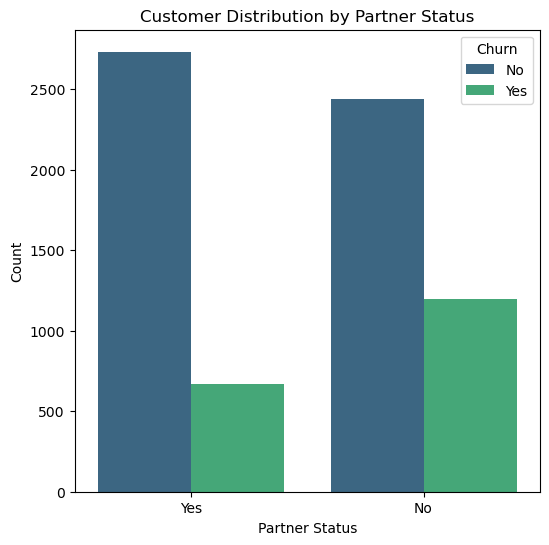

In [37]:
# Visual representation of customer distribution by partner status
plt.figure(figsize=(6, 6))
sns.countplot(x='Partner', data=df, hue='Churn', palette='viridis')
plt.title('Customer Distribution by Partner Status')
plt.xlabel('Partner Status')
plt.ylabel('Count')
plt.show()

In [38]:
# Explore customer distribution by dependent status
dependent_distribution = df['Dependents'].value_counts(normalize=True) * 100
print("\nCustomer Distribution by Dependents Status:")
print(dependent_distribution)


Customer Distribution by Dependents Status:
No     70.041176
Yes    29.958824
Name: Dependents, dtype: float64


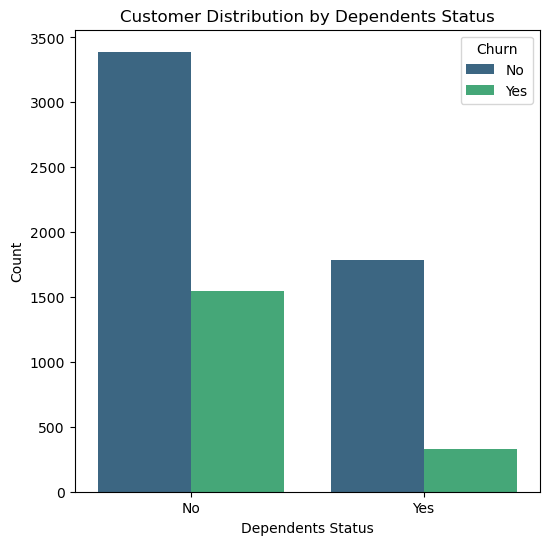

In [39]:
# Visual representation of customer distribution by dependent status
plt.figure(figsize=(6, 6))
sns.countplot(x='Dependents', data=df, hue='Churn', palette='viridis')
plt.title('Customer Distribution by Dependents Status')
plt.xlabel('Dependents Status')
plt.ylabel('Count')
plt.show()

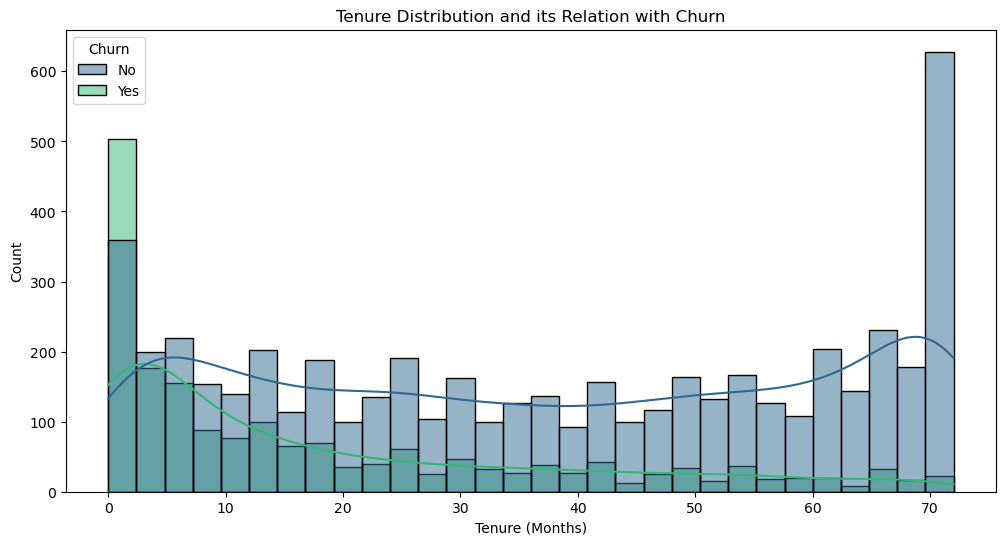

In [40]:
# Analyze tenure distribution and its relation with churn
plt.figure(figsize=(12, 6))
sns.histplot(x='tenure', data=df, bins=30, kde=True, hue='Churn', palette='viridis')
plt.title('Tenure Distribution and its Relation with Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

In [41]:
# Investigate how churn varies across different contract types
contract_churn = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Percentage Across Different Contract Types:")
print(contract_churn)


Churn Percentage Across Different Contract Types:
Churn                  No        Yes
Contract                            
Month-to-month  57.290323  42.709677
One year        88.730482  11.269518
Two year        97.168142   2.831858


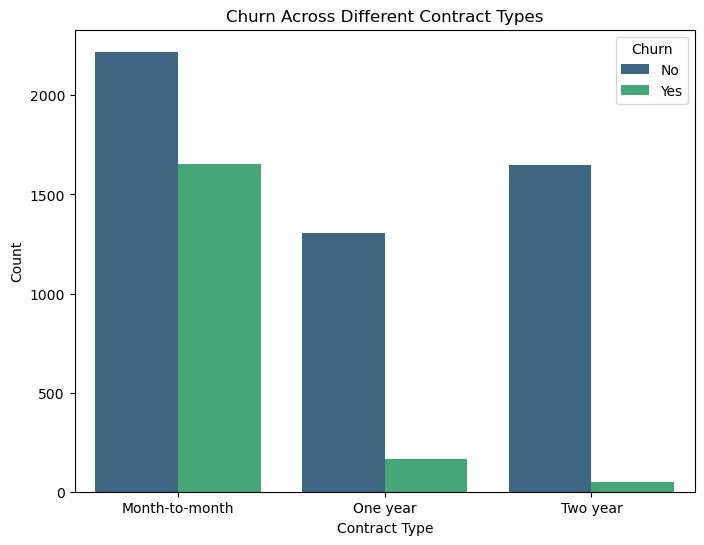

In [42]:
# Visual representation of churn across different contract types
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Across Different Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


In [43]:
# Investigate how churn varies across different payment methods
payment_churn = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack() * 100
print("\nChurn Percentage Across Different Payment Methods:")
print(payment_churn)


Churn Percentage Across Different Payment Methods:
Churn                             No        Yes
PaymentMethod                                  
Bank transfer (automatic)  83.290155  16.709845
Credit card (automatic)    84.756899  15.243101
Electronic check           54.714588  45.285412
Mailed check               80.893300  19.106700


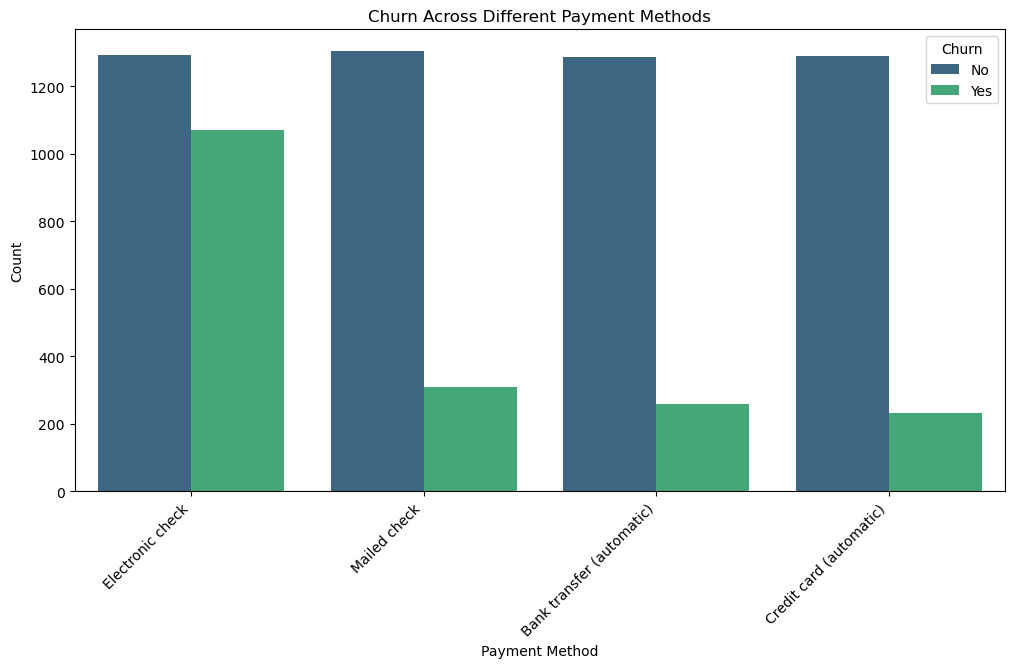

In [44]:
# Visual representation of churn across different payment methods
plt.figure(figsize=(12, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df, palette='viridis')
plt.title('Churn Across Different Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


# Task 3: Customer Segmentation

In [45]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'C:/Users/Dell/Downloads/Telco_Customer_Churn_Dataset  (3).csv'
df = pd.read_csv(file_path)

# Select relevant features for segmentation
features = ['tenure', 'MonthlyCharges', 'Contract']

# Filter data and handle missing values if any
segmentation_data = df[features].dropna()

# Convert 'Contract' feature to numerical representation
segmentation_data['Contract'] = segmentation_data['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

# Standardize the features
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(segmentation_data_scaled)

# Analyze churn rates within clusters
churn_rates = df.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()
print("Churn Rates within Clusters:")
print(churn_rates)

# Identify high-value customers in each cluster
high_value_customers = df.groupby('Cluster').apply(lambda x: x[x['MonthlyCharges'] > x['MonthlyCharges'].mean()])
print("\nHigh-Value Customers within Clusters:")
print(high_value_customers[['customerID', 'tenure', 'MonthlyCharges', 'Contract', 'Churn']])


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Churn Rates within Clusters:
Churn          No       Yes
Cluster                    
0        0.871677  0.128323
1        0.576872  0.423128
2        0.977511  0.022489

High-Value Customers within Clusters:
              customerID  tenure  MonthlyCharges        Contract Churn
Cluster                                                               
0       12    8091-TTVAX      58          100.35        One year    No
        13    0280-XJGEX      49          103.70  Month-to-month   Yes
        15    3655-SNQYZ      69          113.25        Two year    No
        17    9959-WOFKT      71          106.70        Two year    No
        26    6467-CHFZW      47           99.35  Month-to-month   Yes
...                  ...     ...             ...             ...   ...
2       6949  3648-GZPHF      32           36.25        One year    No
        6964  1264-FUHCX      49           56.30        One year    No
        6966  6598-KELSS      50           43.05        One year    No
        697

# Task 4: Churn Prediction Model

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
data_path = 'C:/Users/Dell/Downloads/Telco_Customer_Churn_Dataset  (3).csv'
df = pd.read_csv(data_path)

# Preprocessing
# Convert categorical variables to numerical
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7969711310932324
Precision: 0.6738609112709832
Recall: 0.4895470383275261
F1 Score: 0.5671039354187689


# Task 5: Model Evaluation and Interpretation

Accuracy: 0.7969711310932324
Precision: 0.6738609112709832
Recall: 0.4895470383275261
F1 Score: 0.5671039354187689


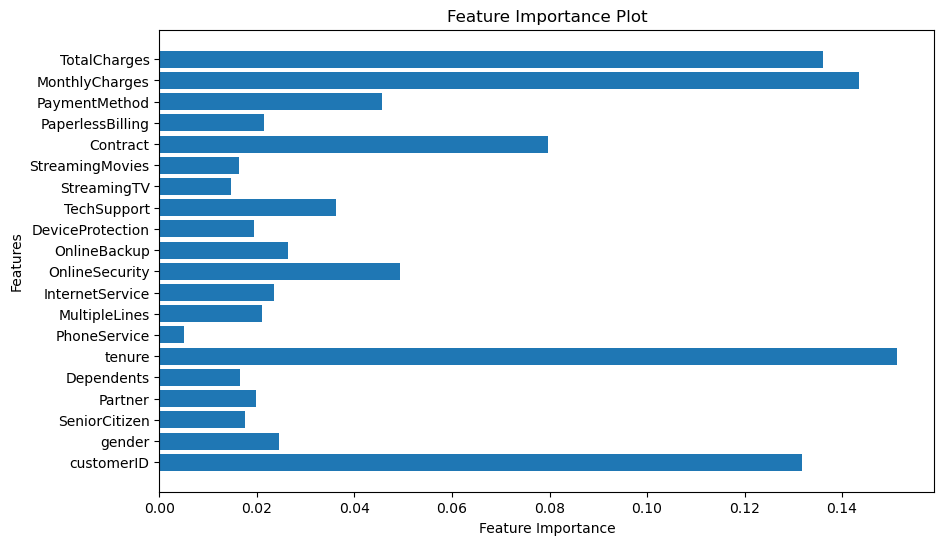

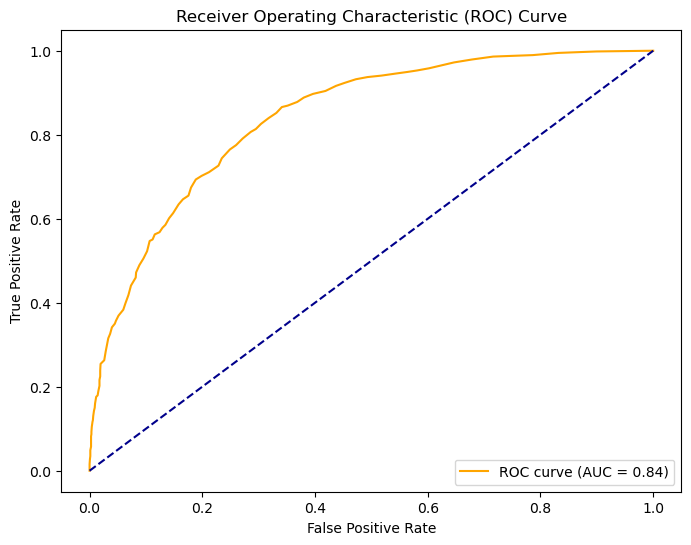

AUC Score: 0.8409862732712541


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Interpretation - Feature Importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# ROC Curve and AUC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("AUC Score:", auc)
